# Object detection with Yolov5

## Basics for Object Detection
Object detection involves classifying localized bounding boxes in the image, that is classifying the objects and searching on the position for the bounding box. Through object detection mechanisms and algorithms, we are able to understand what's in an image, while being able to describe both what is in an image and the locations of those objects in the image.
<br>
On a predefined set of class labels (e.g. people and cars), object detection helps us describe the locations of each detected object in the image using a bounding box. The training data for object detection models include images and corresponding bounding box coordinates. 


## Input data format types for object detection tasks: VOC and MS-COCO

Input data for Pascal VOC is an XML file, whereas COCO dataset uses a JSON file.

Bounding boxes in VOC and COCO challenges are differently represented and they are as follows:
1. PASCAL VOC: (xmin-top left, ymin-top left,xmax-bottom right, ymax-bottom right)
2. COCO: (x-top left, y-top left, width, height)

The JSON file for MS COCO contains the images and their corresponding labels.
Sample image and annotations:
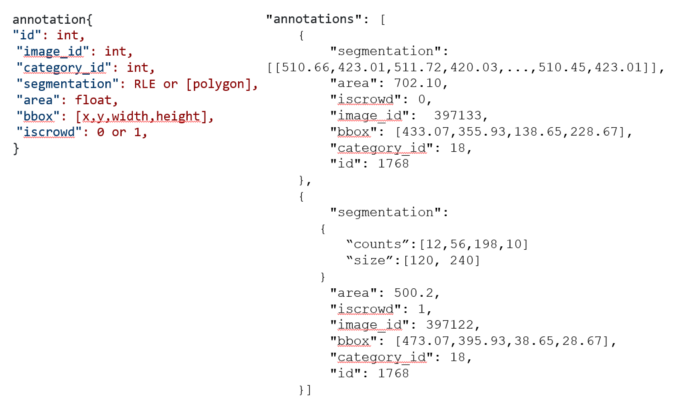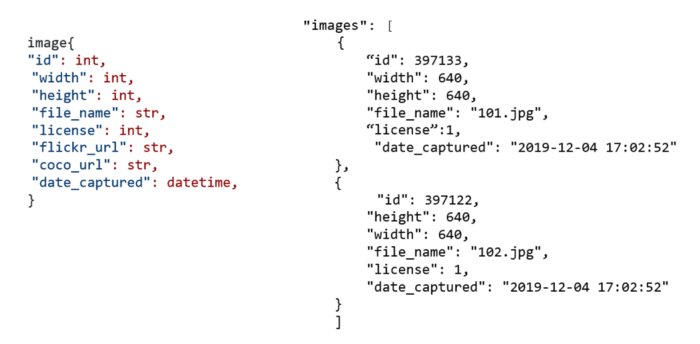


<br>Example PASCAL VOC bounding box<br>
The format of bounding box in the provided json is specified by upper left coordinates and respective dimensions (width, height) of each box.<br>
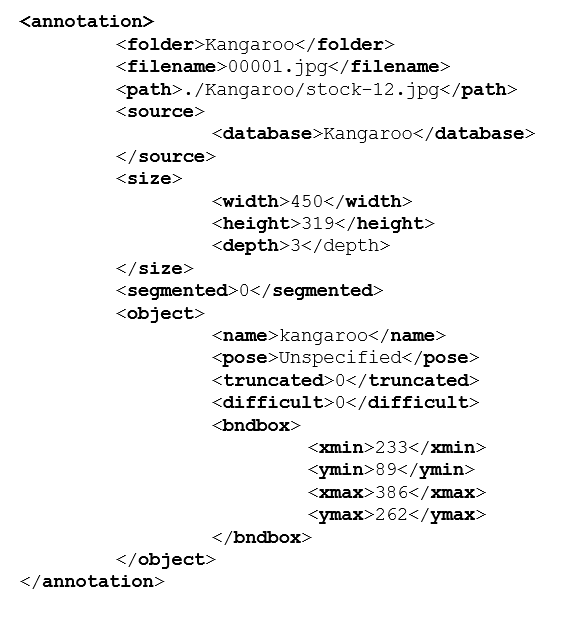

# Detection Mechanisms:
 
One stage detector algorithms such as models belonging to the SSD, YOLO classes of models and RetinaNet (as opposed to two stage detectors for instance: RCNN, Fast RCNN or Faster RCNN which have a region proposal network which could be learnable) do not have an intermediate stage which must be performed to produce the output, leading to accelerated training and inference.

## Two State Detection:
Framework for two stage object detection networks (RCNN, Fast RCNN or Faster RCNN) is as follows:
1. Extracting regions of interest which are then warped to a fix size image, as is required by the CNN (with or without the RoI pooling layer)
2. Feature extraction is extracted by running a pretrained convolutional network on top of the region proposals.
3. A classifier such as SVM makes classification decisions based on extracted features.
4.In an effort to reduce objects belonging to the background class, we use hard negative mining which helps filter out anchor boxes that do not contain an object.
5. Bounding box regression to predict location and size of the bounding box surrounding the object (using coordinates for box origin with dimensions of the bounding boxes)<br>
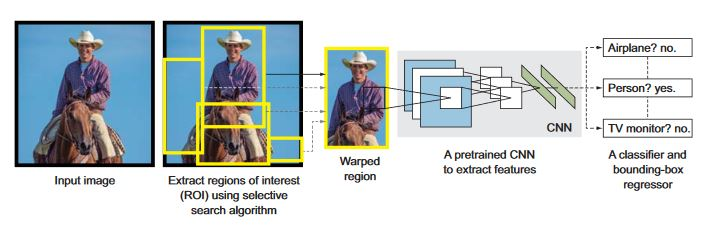
### Issues with the two stage detectors:
1. Slow inference and expensive training policy
2. Multi-stage pipeline training (CNN, classifier and regressor)

## One Stage Detection
In single stage detectors, the convolutional layers make predictions in one shot, with the approach being based on a feed forward network that creates a fix sized collection of bounding boxes, the objectness of each bounding box being then predicted by the logic regression as indicative of the level of overlap with the ground truth.<br>
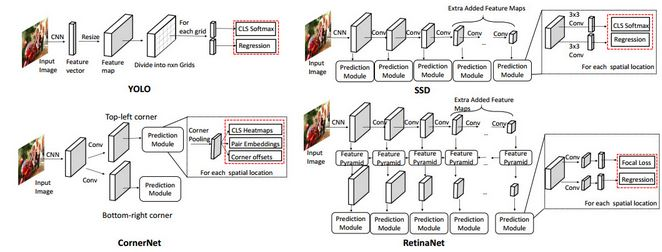
### SSD:
Working of the Single Shot Multibox Detection networks is based on these components:
1. Feature extractor convolutional network
2. Multi scaled feature layers which decrease in size progressively to allow for prediction of detections at multiple scales.
3. Non Maximum Suppression for elimination of overlapping bounding boxes, keeping only one box per each object detected.

###YOLO family:

You Only Look Once (YOLO) family of detection frameworks aim to build a real time object detector, which what they lack in small differences of accuracy when compared to the two stage detectors, are able to provide faster inferences.

YOLO does not go through a regional proposal phase (as was the case with two stage detectors), instead predicts over limited bounding boxes generated by splitting image into a grid of cells, with each cell being responsible for classification and generation of bounding boxes, which are then consolidated by NMS.

**Steps**:
1. Prediction of bounding box coordinates (cell location offsets: [x, y] and dimensions of bounding box: [width, height])
2. Objectness score which indicates the probability of the cell contains an object. (probability that box contains an object x IoU of prediction and ground truth)
3. Class Prediction using sigmoid/softmax: if bounding box contains an object- network predicts probability for K number of classes.


## YOLOv5 architecture
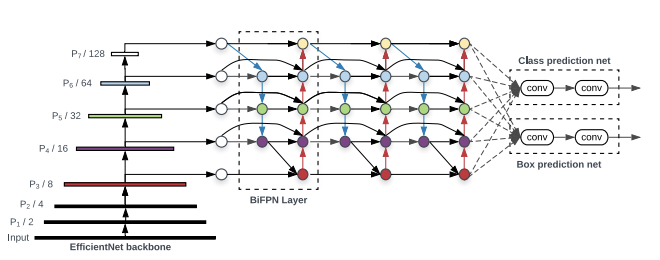

### New ideas:

1. **Data Augmentations** <br>
Possibly one of the game changing aspects of YOLO is the use of mosaic augmentation, which helps detect smaller objects in the image by combining four images into one in arbitrary ratios. It encourages localization of a variety of images in different portions of the image.
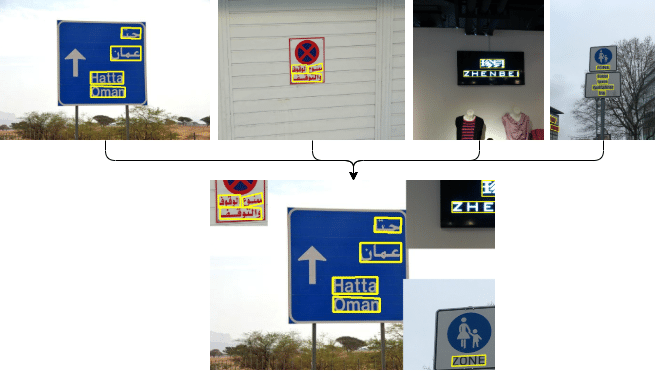
2. **Anchor Boxes**<br>
Usually learnt based on distribution of bounding boxes in a custom dataset through clustering. Yolov3 introduced the importance of learning anchor boxes through the custom dataset yields better accuracy. A YAML specified must contain number of input channels to network, depth and width multipliers and anchor box dimensions.
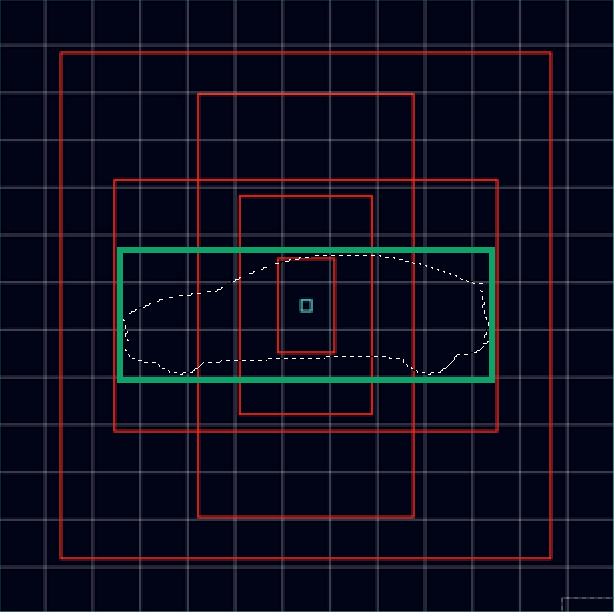
3. **Backbone**
Cross Stage Partial networks, with close connection to the densenet layer, solve the gradient problem in large convolutional nets which leads to lesser parameters thus lesser computational overhead, helping conncect layers which solve issues of vanishing gradients and assisting the ability of network to learn mappings of reused features.
YOLOv5 uses CSPDarknet and CSPResNext which help eradicate bottlenecks during computations in CSP DenseNet, which then help improve learning process with the passage of an unedited version of the feature map.<br>
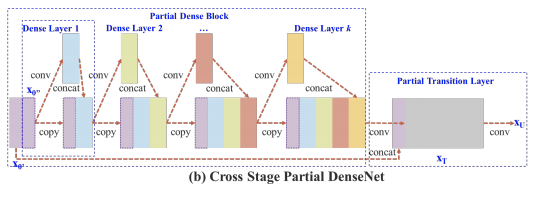
4. **Size and inference speeds** <br>
**YOLOv5 is faster** and 90% smaller than YOLOv4 in size which makes it a winner to be used for real time inference. (27 vs 244 MB)


## Stages of YOLOv5 model

1. **DataLoader** class is used to iterate through the data, returning a tuple with the batch being passed through a deep neural network.
2. A **loss function** lets know the model of its inability to fit the data, with idea being to converge on an optimum set of parameters.
3. **Splitting into training and testing data** : The issue may then be that the model "**overfits**" the training data and may fail when generalizing to a different subset. So we need for separate training, validation and testing steps which help combat overfitting. They help us have the idea of how well our model does on unseen data.
In an effort to increase model's performance on validation data, we can tune **training hyperparameters**, **model architecture** and make use of **data augmentation techniques**.
3. The **metric** used to determine model performance is **Mean Average Precision**. **Precision**, which is the measure of the percentage of correctly predicted labels, and **recall**, which is the measure of how well the model was able to fit the datapoints corresponding to the positive class, are along with IoU (Intersection over Union) which is the area of the overlap between our predictions and ground truth. A threshold is usually chosen to classify whether the prediction is a true positive or a false negative. **Average precision** is the area under the precision-recall curve and follows precision and recall in having a value between 0 and 1. Interpolation of the precision value for a recall by the maximum precision which makes the curve between precision and recall be less susceptible to small changes in ranking of the points. **Mean Average Precision (or mAP)** is calculated by average precision values for each class label.




## Cloning yolov5 repository
This step helps clone the YoloV5 repository while installing all the required libraries into our environment.

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git
!pip3 install -r yolov5/requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5586 (delta 0), reused 2 (delta 0), pack-reused 5581
Receiving objects: 100% (5586/5586), 8.17 MiB | 34.85 MiB/s, done.
Resolving deltas: 100% (3818/3818), done.
     |████████████████████████████████| 645kB 23.3MB/s 
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## Input Pipeline

1. Load images and annotations
2. Extract relevant fields
3. Creating consolidated data frame of images and annotations
4. Split data into training and validation sets
5. Convert input format to one that is supported by YOLO
6. Transform and save respective images and bounding boxes based on YOLO formatted labels

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tfa
import pandas as pd
import numpy as np
import shutil
import json
import os
import cv2

class InputPipeline:
    def __init__(self,input_file
                 ,width=1024.0
                 ,height=1024.0):
      """
      Class to convert format of input images and
      bounding boxes to the one supported by YOLOv5.
      """
      self.file = input_file
      self.width = width
      self.height = height
      self._main()

    def _load_json(self):      
      """
      Loading the json file for images and bboxes.
      """
      annotate = open(self.file)
      annotation_file = json.load(annotate)
      return annotation_file
    
    def _extract_column(self):
      """
      Extract relevant fields from images and annotations
      """
      annotation_file = self._load_json()
      images = pd.json_normalize(annotation_file['images'])
      boxes = pd.json_normalize(annotation_file['annotations'])
      return images, boxes
    
    def _clean_data(self):
      """
  	  Dropping irrelevant columns from images and bounding box dataframes
      """
      images, boxes = self._extract_column()
      images.drop('license',axis=1,inplace=True)
      boxes.drop(['segmentation','license','id','area','iscrowd']
                       ,axis=1,inplace=True)
      images.rename(columns = {'id':'image_id'}, inplace = True)
      return images, boxes
      
    def _merge_data(self):
      """
      Consolidating image and bounding box dataframes, grouping by image_id field
      """
      images, boxes = self._clean_data()
      boxes = boxes.groupby('image_id').\
            aggregate(lambda tdf: tdf.tolist())
      final_data = pd.merge(images,boxes,on="image_id")
      return final_data
    
    def _spliting_data(self):
      """
      Splitting data to train and validation subsets
      """
      final_data = self._merge_data()
      train_data, test_data = train_test_split(final_data,test_size=0.1,
                                         shuffle=True)
      train_data.reset_index(drop=True,inplace=True)
      test_data.reset_index(drop=True,inplace=True)
      return train_data, test_data

    @staticmethod
    def convert_format_xywh(out):
      """
      Convert bounding box coordinates 
      (x_upperLeft, y_upperLeft, x_bottomRight, y_bottomRight)
      to the format supported by YOLOv5:
      (x_center, y_center, width, height)
      """
      return np.stack([
        (out[...,0]+out[...,2])/2.0,
        (out[...,1]+out[...,3])/2.0,
        out[...,2]-out[...,0],
        out[...,3]-out[...,1]],axis=-1)
       
    def _transform(self,data):
      """
      Rescale bounding boxes to (1024, 1024)
      and convert bounding boxes to their relative values
      """
      for id,bboxes in enumerate(data.bbox):
        for idx,box in enumerate(bboxes):
          box.insert(0,(data["category_id"][id][idx]-1))
          box[3] = box[3]+box[1]
          box[4] = box[4]+box[2]
          box[1] = (box[1]*self.width)/data.width[id]
          box[2] = (box[2]*self.height)/data.height[id]
          box[3] = (box[3]*self.width)/data.width[id]
          box[4] = (box[4]*self.height)/data.height[id]
          box[1:] = self.convert_format_xywh(np.array(box[1:]))
          box[1] = box[1]/self.width
          box[2] = box[2]/self.height
          box[3] = box[3]/self.width
          box[4] = box[4]/self.height
    
    def _creating_data(self):
      """
      Apply all functions and create updated subsets of data
      """
      train_data, test_data = self._spliting_data()
      self._transform(train_data)
      self._transform(test_data)
      return train_data, test_data
    
    @staticmethod
    def _make_dir(path):
      if not os.path.exists(path):
        os.makedirs(path)

    def _saving_images_labels(self,data,choose_train_val="train"):
      """
      Save images and bounding boxes to respective directories of data subsets
      """
      self._make_dir(f"yolov5_data/labels/{choose_train_val}/")
      self._make_dir(f"yolov5_data/images/{choose_train_val}/")
      for idx,row in enumerate(data.values):
        filename = "yolov5_data/labels/{}/{}".format(choose_train_val,
                                             (data['file_name'][idx]).split(".")[0]+".txt")
        np.savetxt(filename,data["bbox"][idx],
                    fmt=["%d","%f","%f","%f","%f"])
        shutil.copyfile(os.path.join("trainval/images/",data["file_name"][idx]),
                          os.path.join(f"yolov5_data/images/{choose_train_val}/",data["file_name"][idx]))

    def _main(self):
      train_data, test_data = self._creating_data()
      self._saving_images_labels(train_data)
      self._saving_images_labels(test_data,choose_train_val="validation")

input = InputPipeline(input_file="trainval/annotations/bbox-annotations.json")

2021-03-29 01:48:14.913597: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


## Training yolov5
The training on the model is done by the train.py. parameters of note, include:
1. **--cfg**: Path to the YAML file for configuration of the YOLOv5 model, which contains our preferences for everything from number of channels, model depth and width multipliers, choices for anchor boxes to our prefereces for the architecture (backbone or head) of the model.
2. **--epochs**: Number of times the training and validation steps are accomplished by forward and backward passes through network to reach a state of mininma on loss function.
3. **--batch**: Size of the batch which is passed through model on training and validation for steps across the network.
4. **--data**: Path to the YAML file which contains the training and validation directories and class names followed by the respective counts.
5. **--img**: Image size of the training images. Upon experimentation with this parameter, 1024 was chosen to be a good parameter value.

In [ ]:
!python yolov5/train.py --img 1024 --batch 4 --epochs 50 --data yolo.yml --cfg yolov5/models/yolov5s.yaml

github: skipping check (not a git repository)
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀  torch 1.8.0+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=4, bbox_interval=-1, bucket='', cache_images=False, cfg='yolov5/models/yolov5s.yaml', data='/content/yolo.yml', device='', entity=None, epochs=50, evolve=False, exist_ok=False, global_rank=-1, hyp='./yolov5/data/hyp.scratch.yaml', image_weights=False, img_size=[1024, 1024], linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=4, upload_dataset=False, weights='yolov5s.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2021-03-24 10:14:26.606468: I tensorflow/stream_executor/platform/defau

## Detection with yolov5
In the final step, we should be able to detect objects on unseen images and label them into respective categories (localization+classification), which is accomplished by running the command detect.py.
It has the following arguments most commonly used as per their usage in the model:
1. **--source**: Path to the test image
2. **--weights**: Path to saved weights
3. **--img**: Size of the test image
4. **--save_txt**: either have predicted bounding boxes drawn on the localized object in the image or predict predictions to a text file


In [ ]:
!python yolov5/detect.py --source /content/yolov5_data/images/validation --weights /content/runs/train/exp/weights/best.pt

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='/content/yolov5_data/images/validation', update=False, view_img=False, weights=['/content/runs/train/exp/weights/best.pt'])
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀  torch 1.8.0+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7056607 parameters, 0 gradients, 16.3 GFLOPS
image 1/2015 /content/yolov5_data/images/validation/image_000000001.jpg: 480x640 1 person, 2 cars, Done. (0.011s)
image 2/2015 /content/yolov5_data/images/validation/image_000000002.jpg: 384x640 1 person, 2 cars, Done. (0.010s)
image 3/2015 /content/yolov5_data/images/validation/image_000000003.jpg: 448x640 11 persons, 1 car, Done. (0.012s)
image 4/2015 /content/yolov5_data/images/validation/image_000000004.jpg: 448x640 1 person, 1 car, Done. (0.010

## Docker
Docker helps in execution of processes in isolated containers (lightweight execution environments), with a container being any process which runs on a host, which could be be local or remote.

### Commands in use:

1.
**Command**: **docker build**

**Usage**: docker build . -t yolov5:0.1

**Description**: Helps builds Docker images from a Dockerfile and a context, which are files located on a specified path.


2.
**Command**: **docker run**

Usage to detect objects in a user specified image: docker run --name yolov5 yolov5:v1.0 python3 detect.py --source image_000000068.jpg --weights best.pt --project /root/yolov5

Description: This command executes the containerised application of YOLOv5 with parameters used:
1. --name: name/identifier of the container.
2. --tag: used to specify version of the docker image we want to run on the container.
3. file specific params: source image (detect.py), weights (best.pt) and save directory (--project)


3.
**Command**: **docker cp**

**Usage**: docker cp yolo:/root/yolov5 C:\Users\HP\Downloads\docker\yolov5

**Description**: This command copies the contents of a source path to the destination path, from the container's file system to a local machine or vice versa.





### **Dockerfile**:
 It is a text file containing all instructions and commands which could be called by the user to build an image.


In [ ]:
FROM nvidia/cuda:10.2-cudnn7-devel-ubuntu18.04
ENV DEBIAN_FRONTEND noninteractive
ENV QT_DEBUG_PLUGINS = 1
RUN apt-get -y update && apt-get install -y git pkg-config
RUN apt-get install -y python3-pip
RUN cd /root && git clone https://github.com/ultralytics/yolov5
COPY best.pt /root/yolov5/
COPY image_000000068.jpg /root/yolov5/
WORKDIR /root/yolov5
RUN pip3 -q install pip --upgrade
RUN pip3 install urllib3 pyasn1 idna && \
 pip3 install chardet certifi rsa && \
 pip3 install requests pyasn1-modules oauthlib && \
 pip3 install pytz python-dateutil pyparsing && \
 pip3 install Pillow numpy kiwisolver && \
 pip3 install google-auth cycler wheel && \
 pip3 install werkzeug torch tensorboard-plugin-wit && \
 pip3 install scipy protobuf pandas && \
 pip3 install matplotlib markdown grpcio && \
 pip3 install google-auth-oauthlib Cython absl-py && \
 pip3 install tqdm torchvision thop && \
 pip3 install tensorboard seaborn PyYAML && \
 pip3 install setuptools six pycocotools && \
 pip3 install opencv-python>=4.1.2  

## PR Curve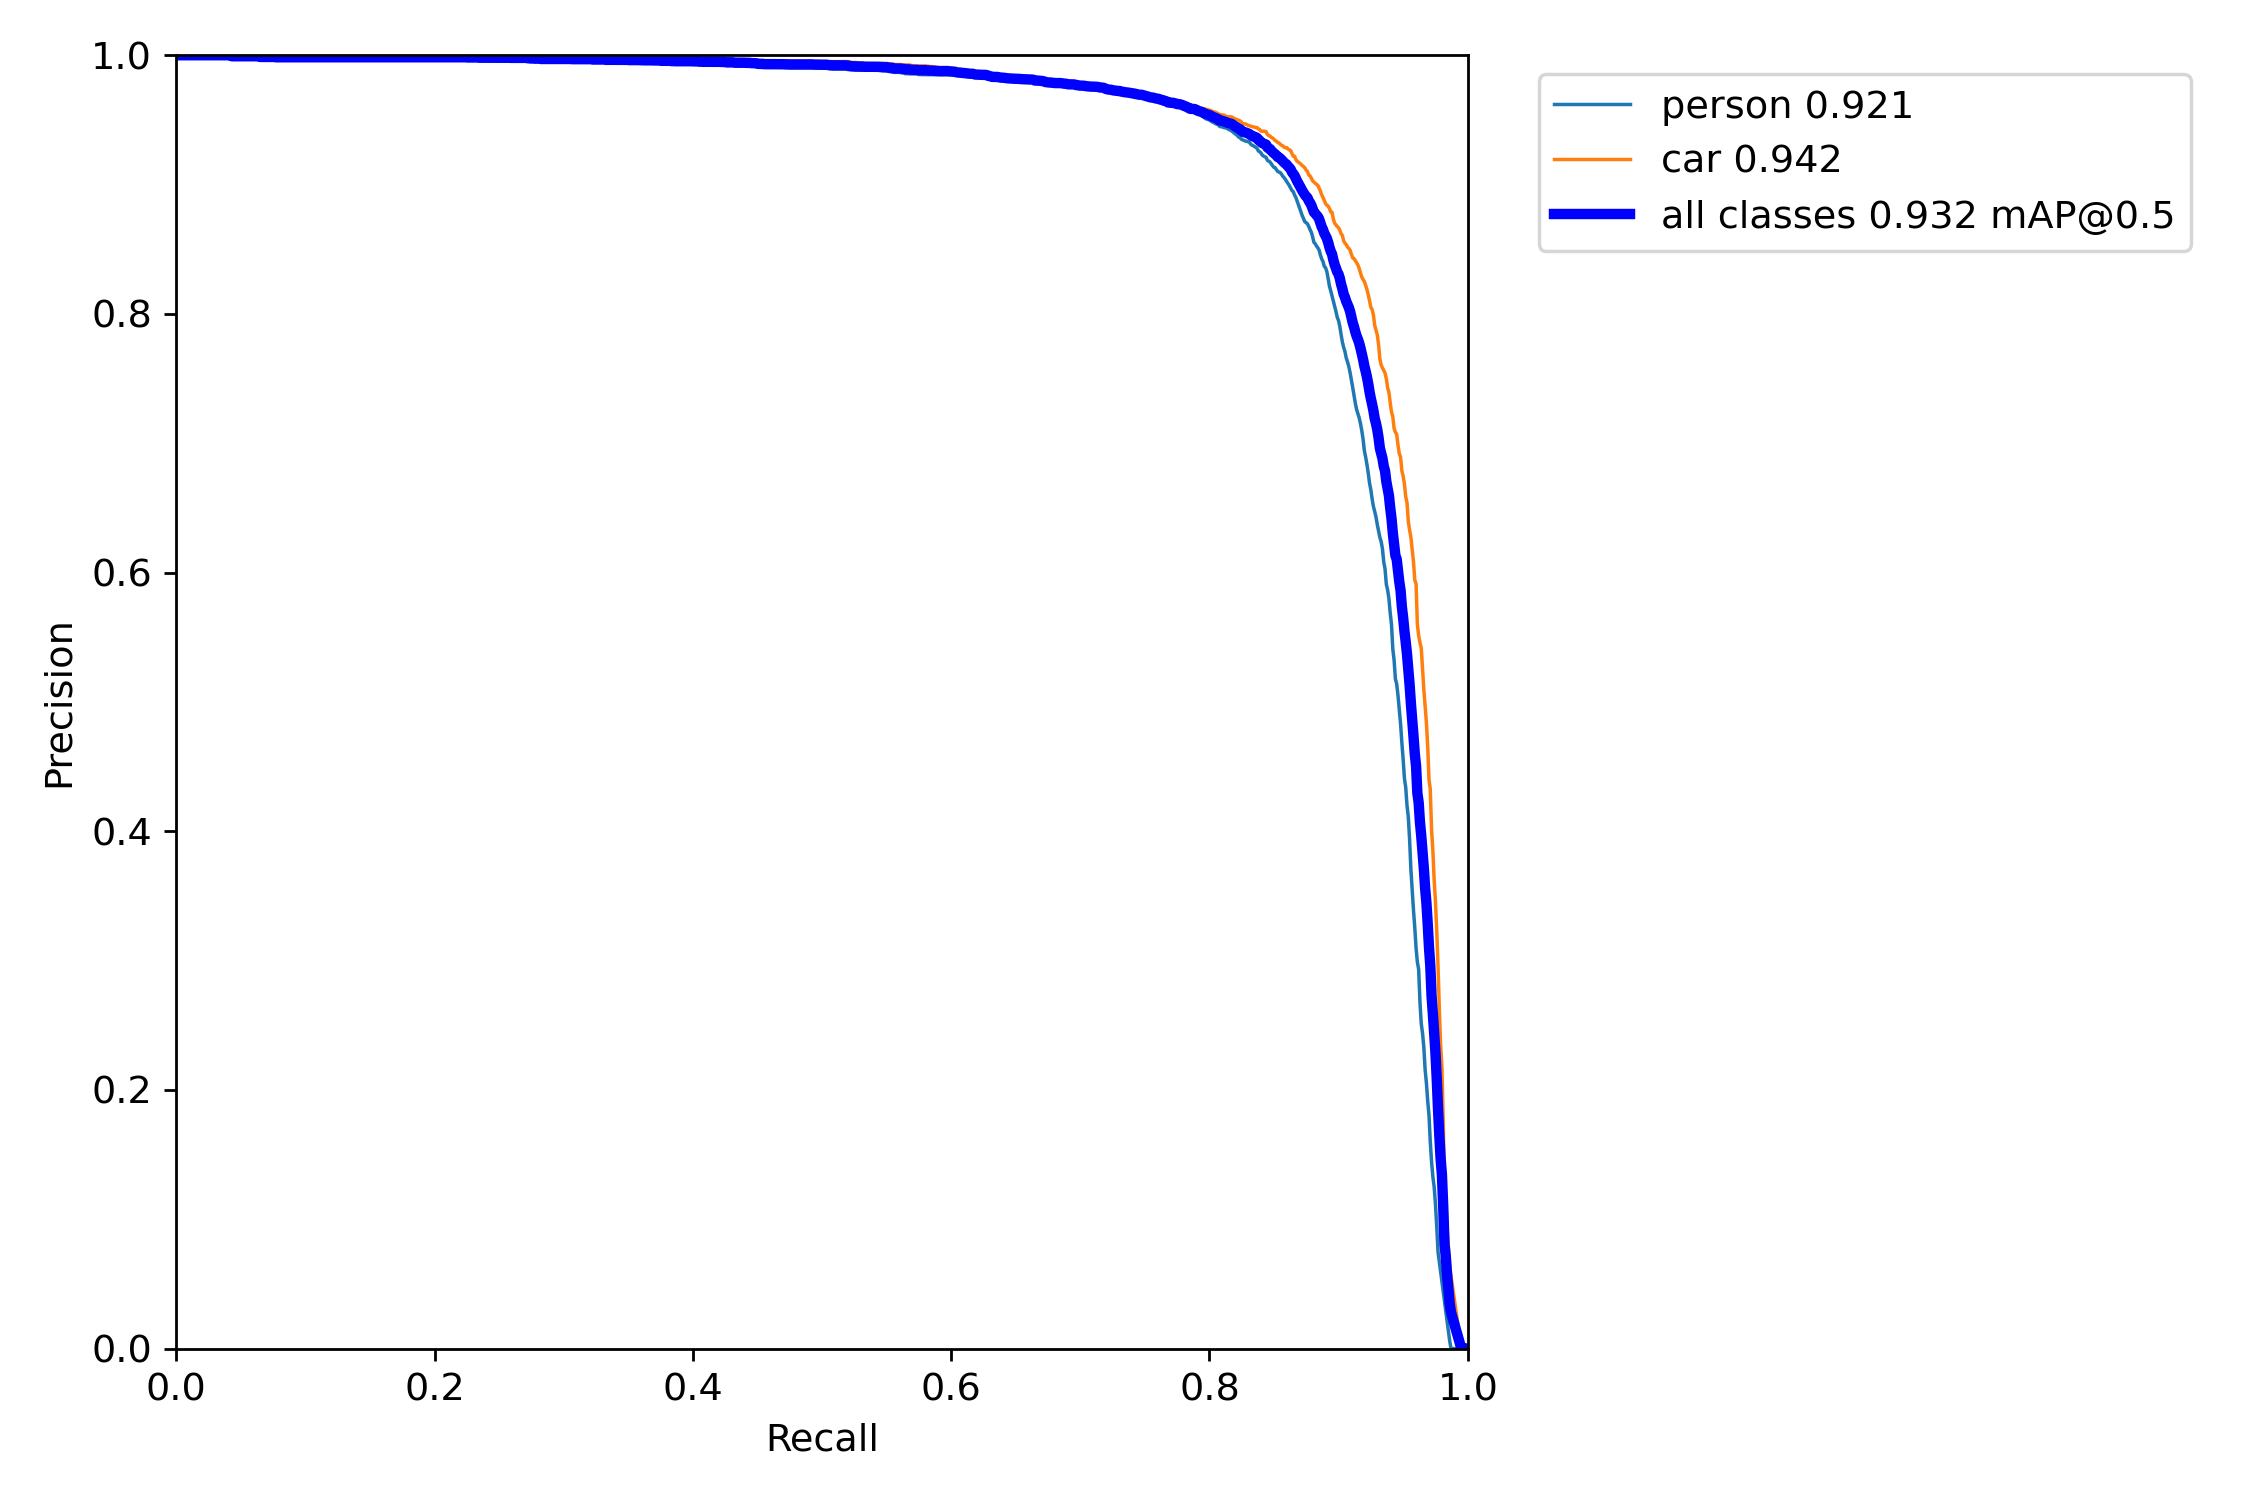

## Results 
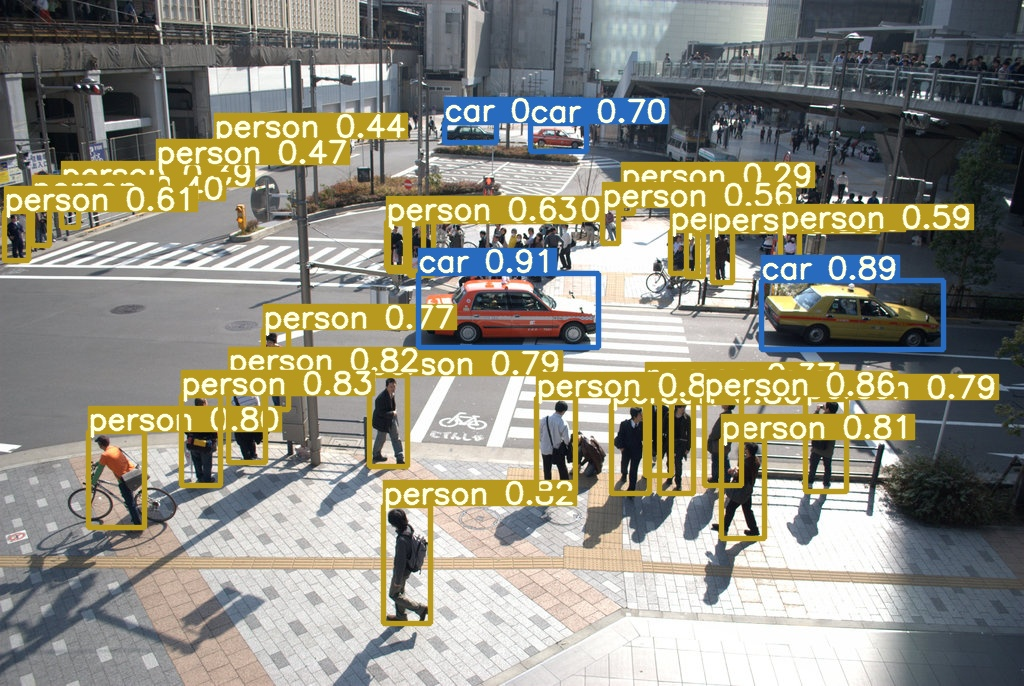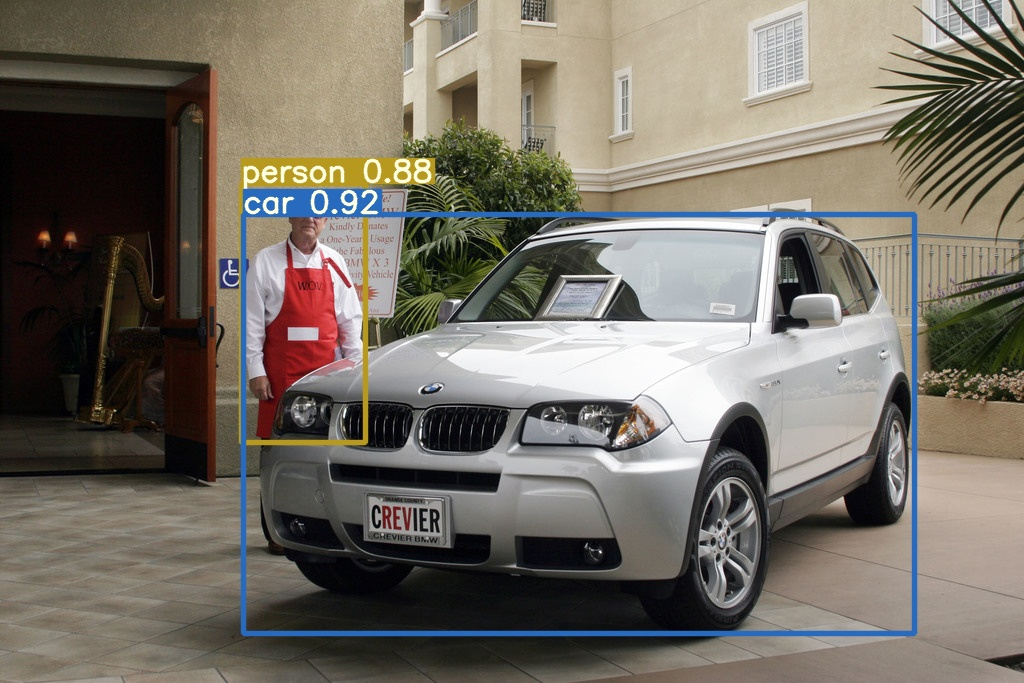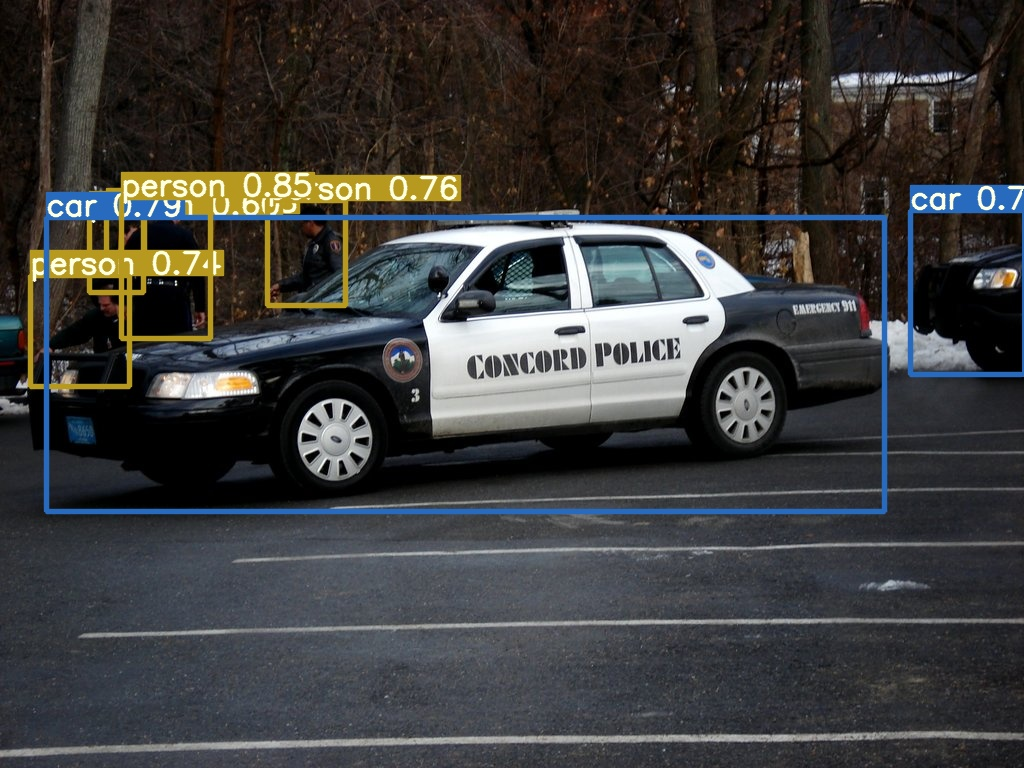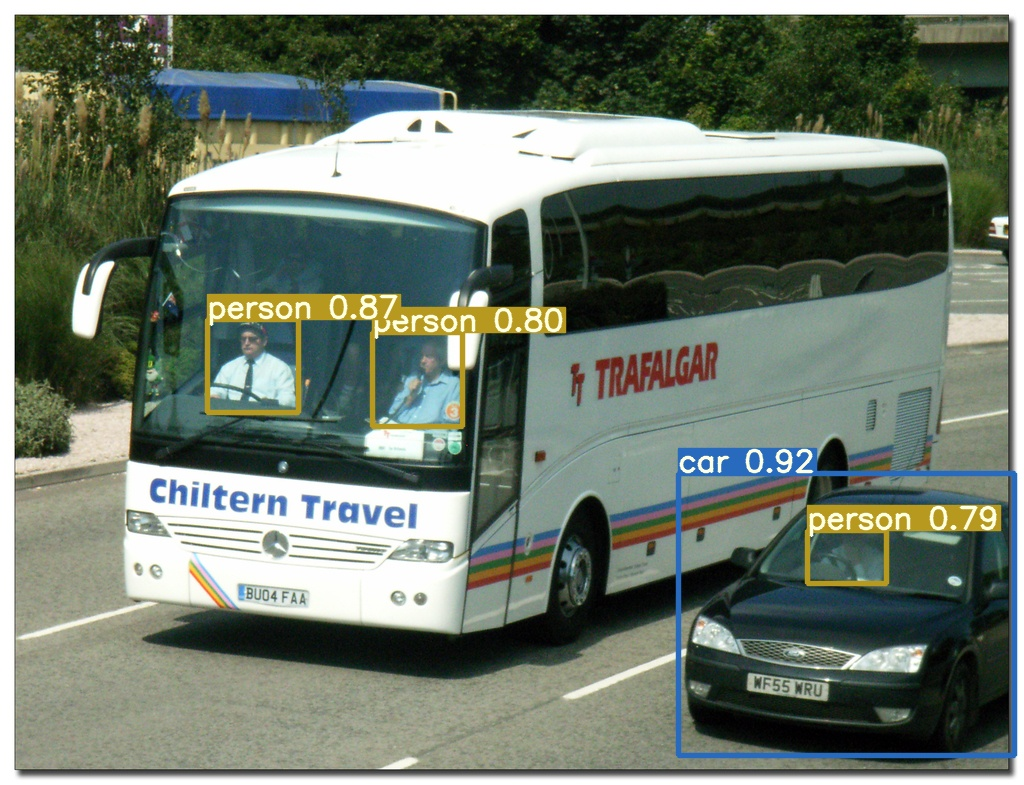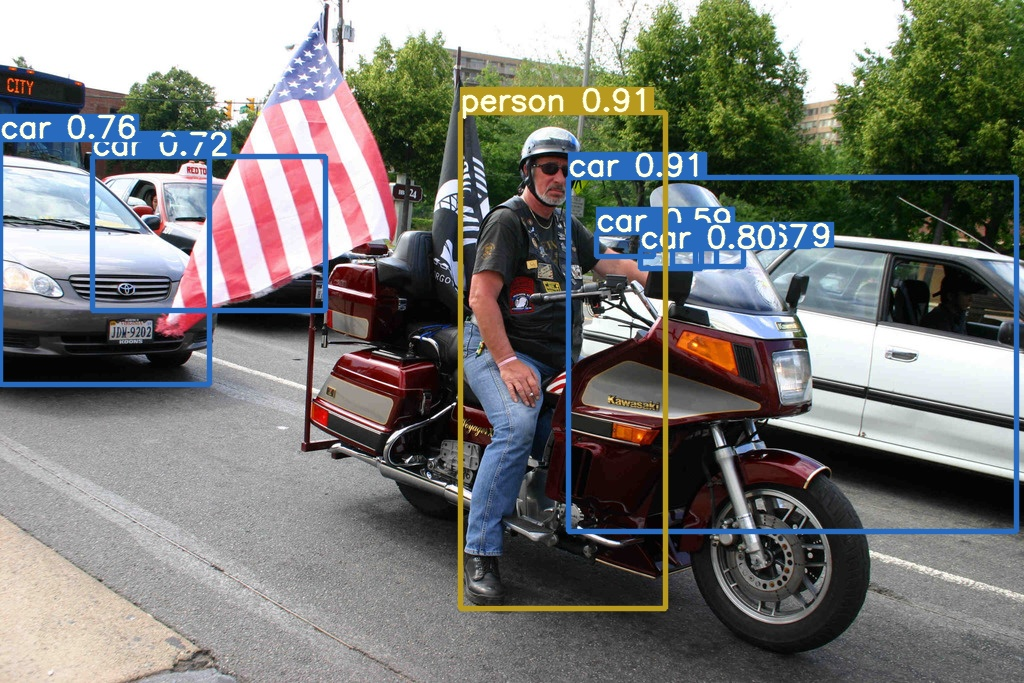